![title](LogoEPL.jpg)
<b><p style='text-align: center;'> Algorithms in Data Science  </p> </b>

<b><p style='text-align: center;'> London Transport System Study </p> </b>
<b><p style='text-align: center;'> Commuters data from November 2009 </p> </b>

<i><p style='text-align: Center;'> Nima Farnoodian , Charles Rongione, Breno Tiburico</p> </i>

In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as ss
from collections import defaultdict 
from difflib import SequenceMatcher
import matplotlib.pyplot as plt

In [3]:
tfl_data = pd.read_csv('Nov09JnyExport.csv')


In [6]:
len(tfl_data)/1000

2623.487

In [7]:
tfl_data = pd.read_csv('Nov09JnyExport.csv')

df = tfl_data.copy()

# delete unstarted for StartStn & EndStation
df = df[df.StartStn != 'Unstarted']
df = df[df.EndStation != 'Unstarted']
df = df[df.StartStn != 'Unstarted']
df = df[df.EndStation != 'Unfinished']
# delete LTB subsystem
df = df[df.SubSystem != 'LTB']

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774275 entries, 45989 to 2623484
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   downo         774275 non-null  int64 
 1   daytype       774275 non-null  object
 2   SubSystem     774275 non-null  object
 3   StartStn      774275 non-null  object
 4   EndStation    774275 non-null  object
 5   EntTime       774275 non-null  int64 
 6   EntTimeHHMM   774275 non-null  object
 7   ExTime        774275 non-null  int64 
 8   EXTimeHHMM    774275 non-null  object
 9   ZVPPT         774275 non-null  object
 10  JNYTYP        774275 non-null  object
 11  DailyCapping  774275 non-null  object
 12  FFare         774275 non-null  int64 
 13  DFare         774275 non-null  int64 
 14  RouteID       774275 non-null  object
 15  FinalProduct  774275 non-null  object
dtypes: int64(5), object(11)
memory usage: 100.4+ MB


,downo,daytype,SubSystem,StartStn,EndStation,EntTime,EntTimeHHMM,ExTime,EXTimeHHMM,ZVPPT,JNYTYP,DailyCapping,FFare,DFare,RouteID,FinalProduct
45989,2,Mon,LUL,Goodge Street,Totteridge,1000,16:40,1041,17:21,Z0110,TKT,N,0,0,XX,Freedom Pass (Elderly)
45994,5,Thu,LUL,Preston Road,Northwood,1000,16:40,1024,17:04,Z0110,TKT,N,0,0,XX,Freedom Pass (Disabled)
45998,5,Thu,LUL,Holborn,Bounds Green,1000,16:40,1028,17:08,Z0104,TKT,N,0,0,XX,LUL Travelcard-Annual
46003,1,Sun,LUL,Earls Court,Pimlico,1000,16:40,1021,17:01,-------,PPY,N,160,160,XX,PAYG
46005,3,Tue,LUL,Victoria,Bethnal Green,1000,16:40,1027,17:07,Z0102,TKT,N,0,0,XX,LUL Travelcard-7 Day


In [9]:
len(df)/1000

774.275

#### <u>Libraries</u>

In [3]:
#import folium
from math import sin, cos, sqrt, atan2, radians
#from folium import plugins


#### <u>Declare Functions</u>

In [13]:
         
            
def Distances(Lat_from, Long_from, Lat_to, Long_to):
    R = 6373.0

    lat1 = radians(Lat_from)
    lon1 = radians(Long_from)
    lat2 = radians(Lat_to)
    lon2 = radians(Long_to)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    dist = R * c
        
    return dist


def clear_name(stname):
    stname=str(stname)
    stname=stname.strip()
    only_alpha=''
    stname=stname.lower()
    for char in stname:
        ## ord(chr) returns the ascii value
        ## CHECKING FOR UPPER CASE
        if ord(char) >= 65 and ord(char) <= 90:
            only_alpha += char
        ## checking for lower case
        elif ord(char) >= 97 and ord(char) <= 122:
            only_alpha += char
        elif ord(char) >= 49 and ord(char) <= 57:
            only_alpha += char
        elif ord(char) == 32:
            only_alpha += '-'
        elif ord(char) == 45:
            only_alpha += '-'
    stname=''.join(only_alpha)
    return stname

from datetime import datetime

def time_category(time):
    # time is a string
    temptime=''
    timeInt=int(time.split(':')[0])
    if timeInt>=24:
        timeInt=timeInt-24
        temptime=str(timeInt)+':'+time.split(':')[1]
        time=temptime
    
    date_time_str = time
    date_time_obj = datetime.strptime(date_time_str, '%H:%M')
    time_24=datetime.strptime('19:00', '%H:%M')
    time_5=datetime.strptime('5:00', '%H:%M')
    time_8=datetime.strptime('8:00', '%H:%M')
    time_11=datetime.strptime('11:00', '%H:%M')
    time_12=datetime.strptime('12:00', '%H:%M')
    time_15=datetime.strptime('15:00', '%H:%M')
    time_16=datetime.strptime('16:00', '%H:%M')
    time_17=datetime.strptime('17:00', '%H:%M')
    time_19=datetime.strptime('19:00', '%H:%M')
    time_21=datetime.strptime('21:00', '%H:%M')
    time_24=datetime.strptime('00:00', '%H:%M')
    pod=''
    if time_5<date_time_obj<=time_8:
        pod='Early Morning'
    if time_8<date_time_obj<=time_11:
        pod='Morning'
    if time_11<date_time_obj<=time_12:
        pod='Late Morning'
    if time_12<date_time_obj<=time_15:
        pod='Early Afternoon'
    if time_15<date_time_obj<=time_16:
        pod='Afternoon'
    if time_16<date_time_obj<=time_17:
        pod='Late Afternoon'    
    if time_17<date_time_obj<=time_19:
        pod='Early Evening'
    if time_19<date_time_obj<=time_21:
        pod='Evening'
    if time_21<date_time_obj:
        pod='Late Evening'
    if time_24<=date_time_obj<=time_5:
        pod='Mid night'
    return pod

In [3]:
clear_name('Heathrow Terminal 4')

'heathrow-terminal-4'

#### <u>Import Data</u>


In [13]:
df = pd.read_csv('Nov09JnyExport.csv')


df = df[df.StartStn != 'Unstarted']
df = df[df.EndStation != 'Unstarted']
df = df[df.StartStn != 'Unstarted']
df = df[df.EndStation != 'Unfinished']
df = df[df.SubSystem != 'LTB']



In [14]:
locations = pd.read_csv('London stations.csv')
locations = locations.set_index('Station')
locations.head()

,OS X,OS Y,Latitude,Longitude,Zone,Postcode
Station,,,,,,
Abbey Road,539081,183352,51.531952,0.003723,3,E15 3NB
Abbey Wood,547297,179002,51.490784,0.120272,4,SE2 9RH
Acton Central,520613,180299,51.508758,-0.263430,2,W3 6BH
Acton Main Line,520296,181196,51.516887,-0.267690,3,W3 9EH
Acton Town,519457,179639,51.503071,-0.280303,3,W3 8HN


In [15]:
tube = pd.read_csv('London tube lines.csv')


In [16]:
len(df)

774275

In [17]:
distance_vector = []
for fro, to, line in zip(tube['From Station'], tube['To Station'], tube['Tube Line']):
                        
    Lat_from = locations.loc[fro]['Latitude']
    Long_from = locations.loc[fro]['Longitude']
                         
    Lat_to = locations.loc[to]['Latitude']
    Long_to = locations.loc[to]['Longitude']
    
    #print(Lat_from)
    #print(Long_from)
    #print(Lat_to)
    #print(Long_to)
    distance = Distances(Lat_from, Long_from, Lat_to, Long_to)
    
    distance_vector.append(distance)
tube['Distance km'] = distance_vector

In [18]:
df.head()

,downo,daytype,SubSystem,StartStn,EndStation,EntTime,EntTimeHHMM,ExTime,EXTimeHHMM,ZVPPT,JNYTYP,DailyCapping,FFare,DFare,RouteID,FinalProduct
45989,2,Mon,LUL,Goodge Street,Totteridge,1000,16:40,1041,17:21,Z0110,TKT,N,0,0,XX,Freedom Pass (Elderly)
45994,5,Thu,LUL,Preston Road,Northwood,1000,16:40,1024,17:04,Z0110,TKT,N,0,0,XX,Freedom Pass (Disabled)
45998,5,Thu,LUL,Holborn,Bounds Green,1000,16:40,1028,17:08,Z0104,TKT,N,0,0,XX,LUL Travelcard-Annual
46003,1,Sun,LUL,Earls Court,Pimlico,1000,16:40,1021,17:01,-------,PPY,N,160,160,XX,PAYG
46005,3,Tue,LUL,Victoria,Bethnal Green,1000,16:40,1027,17:07,Z0102,TKT,N,0,0,XX,LUL Travelcard-7 Day


In [19]:
tube.head()

,Tube Line,From Station,To Station,Distance km
0,Bakerloo,Baker Street,Regents Park,0.803591
1,Bakerloo,Charing Cross,Embankment,0.204870
2,Bakerloo,Edgware Road (Bakerloo),Marylebone,0.525181
3,Bakerloo,Embankment,Waterloo,0.782531
4,Bakerloo,Harlesden,Willesden Junction,1.041189


In [20]:
df.groupby(by=['StartStn','EndStation']).count()['downo']

StartStn                        EndStation          
ADDISCOMBE TRAM                 Not Applicable          264
ADDNGTN VIL TRAM                Not Applicable          202
                                Wimbledon                13
AMPERE WAY TRAM                 Not Applicable          296
                                Wimbledon                39
                                                       ... 
Woolwich Arsenal DLR            Willesden Junction        1
                                Wood Green                6
                                Wood Lane                 1
                                Woodford                  1
                                Woolwich Arsenal DLR     13
Name: downo, Length: 55709, dtype: int64

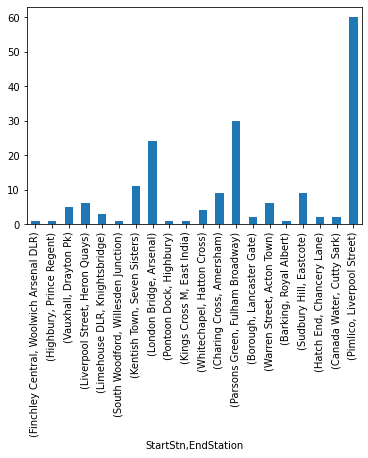

In [350]:
df.groupby(by=['StartStn','EndStation']).count()['downo'].sample(20).plot(kind='bar')
                                                                        

In [21]:
groups=df.groupby(by=['StartStn','EndStation']).count()['downo']

## Processing  Station Names

In [22]:
len(df.groupby(by=['StartStn','EndStation']).count()['downo'])

55709

In [23]:
df=df[df['EndStation']!='Not Applicable']

In [24]:
len(df.groupby(by=['StartStn','EndStation']).count()['downo'])

55670

In [27]:
a="Liverpool's s-t NR 22  "

In [28]:
clear_name(a)

'liverpools-s-t-nr-22'

### On df (Journey)

In [29]:
df['StartStn']=df['StartStn'].apply(clear_name)
df['EndStation']=df['EndStation'].apply(clear_name)

In [30]:
all_stat_df=set(list(df['StartStn'].unique())+list(df['EndStation'].unique()))

In [31]:
len(all_stat_df)

443

### On df (tube)

In [32]:
tube['From Station']=tube['From Station'].apply(clear_name)
tube['To Station']=tube['To Station'].apply(clear_name)

In [33]:
all_stat_tube=set(list(tube['From Station'].unique())+list(tube['To Station'].unique()))

In [34]:
len(all_stat_tube)

651

In [35]:
all_stat_tube

{'abbey-road',
 'abbey-wood',
 'acton-central',
 'acton-main-line',
 'acton-town',
 'addington-village',
 'addiscombe',
 'albany-park',
 'aldgate',
 'aldgate-east',
 'alexandra-palace',
 'all-saints',
 'alperton',
 'amersham',
 'ampere-way',
 'anerley',
 'angel',
 'angel-road',
 'archway',
 'arena',
 'arnos-grove',
 'arsenal',
 'avenue-road',
 'baker-street',
 'balham',
 'bank',
 'banstead',
 'barbican',
 'barking',
 'barkingside',
 'barnehurst',
 'barnes',
 'barnes-bridge',
 'barons-court',
 'battersea-park',
 'battersea-power-station',
 'bayswater',
 'beckenham-hill',
 'beckenham-junction',
 'beckenham-road',
 'beckton',
 'beckton-park',
 'becontree',
 'beddington-lane',
 'belgrave-walk',
 'bellingham',
 'belmont',
 'belsize-park',
 'belvedere',
 'bermondsey',
 'berrylands',
 'bethnal-green',
 'bexley',
 'bexleyheath',
 'bickley',
 'birkbeck',
 'blackfriars',
 'blackheath',
 'blackhorse-lane',
 'blackhorse-road',
 'blackwall',
 'bond-street',
 'borough',
 'boston-manor',
 'bounds-gre

## On Locations

In [36]:
locations = pd.read_csv('London stations.csv')
locations['Station']=locations['Station'].apply(clear_name)
locations = locations.set_index('Station')
locations.to_csv('London_stations_matched.csv')


### Matching

In [37]:
print ( 'There are ', len(all_stat_tube-all_stat_df), 'stations in tube that are not mentioned in Journey DataSet')

There are  297 stations in tube that are not mentioned in Journey DataSet


In [38]:
print ( 'There are ', len(all_stat_df-all_stat_tube), 'stations in Journey that are not mentioned in tube DataSet')

There are  89 stations in Journey that are not mentioned in tube DataSet


In [39]:
difference=all_stat_df-all_stat_tube

In [40]:
difference

{'addngtn-vil-tram',
 'ampere-way-tram',
 'arena-tram',
 'balham-nr',
 'balham-scl',
 'beckenhm-jn-tram',
 'beckenhm-rd-tram',
 'beddngtn-ln-tram',
 'belgrave-wk-tram',
 'bethnal-green-nr',
 'birkbeck-tram',
 'blckhrs-lne-tram',
 'caledonian-rdbsby',
 'canary-wharf-dlr',
 'canary-wharf-e2',
 'chalfont--latimer',
 'church-strt-tram',
 'coombe-lane-tram',
 'crossharbour',
 'custom-house-dlr',
 'cutty-sark',
 'drayton-pk',
 'dundonld-rd-tram',
 'east-croydon-tram',
 'edgware-road-b',
 'edgware-road-m',
 'elephant--castle',
 'elmers-end-tram',
 'euston-nr',
 'fenchurch-st-nr',
 'field-way-tram',
 'finchley-rd--frognal',
 'george-strt-tram',
 'gravel-hill-tram',
 'great-portland-st',
 'greenwich-dlr',
 'hammersmith-d',
 'hammersmith-m',
 'harringay-green-las',
 'harrow-wealdstone',
 'hayes--harlington',
 'heathrow-term-4',
 'heathrow-term-5',
 'heathrow-terms-123',
 'high-street-kens',
 'highbury',
 'kings-cross-m',
 'kings-cross-t',
 'lewisham-dlr',
 'leytonstone-high-rd',
 'limehouse-dlr'

In [41]:
differenceTube=all_stat_tube-all_stat_df

In [42]:
differenceTube

{'abbey-road',
 'abbey-wood',
 'addington-village',
 'addiscombe',
 'albany-park',
 'alexandra-palace',
 'ampere-way',
 'anerley',
 'angel-road',
 'arena',
 'avenue-road',
 'banstead',
 'barnehurst',
 'barnes',
 'barnes-bridge',
 'battersea-power-station',
 'beckenham-hill',
 'beckenham-junction',
 'beckenham-road',
 'beddington-lane',
 'belgrave-walk',
 'belmont',
 'belvedere',
 'berrylands',
 'bexley',
 'bexleyheath',
 'bickley',
 'birkbeck',
 'blackheath',
 'blackhorse-lane',
 'bowes-park',
 'brentford',
 'brentwood',
 'brimsdown',
 'bromley-north',
 'bromley-south',
 'broxbourne',
 'bruce-grove',
 'burnham',
 'bush-hill-park',
 'caledonian-road-and-barnsbury',
 'carshalton-beeches',
 'caterham',
 'catford',
 'catford-bridge',
 'centrale',
 'chadwell-heath',
 'chafford-hundred',
 'chalfont-and-latimer',
 'charlton',
 'cheam',
 'chelsfield',
 'cheshunt',
 'chessington-north',
 'chessington-south',
 'chingford',
 'chipstead',
 'chislehurst',
 'chiswick',
 'church-street',
 'clapham-hi

In [43]:
s = SequenceMatcher(None, "caledonian-rdbsby", "caledonian-road-and-barnsbury")
s.ratio()

0.7391304347826086

In [44]:
s = SequenceMatcher(None, "caledonian-rdbsby", "caledonian-road")
s.ratio()

0.8125

In [45]:
unfound={}
for stat in difference:
    maxi=0
    max_match=''
    for real_stat in differenceTube:
        s = SequenceMatcher(None,stat , real_stat)
        if s.ratio()>maxi:
            maxi=s.ratio()
            max_match=real_stat
    unfound[stat]=[max_match, maxi]

In [46]:
unfound

{'caledonian-rdbsby': ['caledonian-road-and-barnsbury', 0.7391304347826086],
 'marylebone-nr': ['maryland', 0.5714285714285714],
 'heathrow-term-5': ['heathrow-terminal-5', 0.8823529411764706],
 'euston-nr': ['chessington-north', 0.6153846153846154],
 'shepherds-bush-nr': ['shepherds-bush', 0.9032258064516129],
 'wandle-park-tram': ['wandle-park', 0.8148148148148148],
 'east-croydon-tram': ['haydons-road', 0.5517241379310345],
 'arena-tram': ['arena', 0.6666666666666666],
 'phipps-brdg-tram': ['phipps-bridge', 0.7586206896551724],
 'coombe-lane-tram': ['coombe-lane', 0.8148148148148148],
 'mitcham-jcn-tram': ['mitcham-junction', 0.6875],
 'rainham-essex': ['rainham', 0.7],
 'edgware-road-b': ['edgware-road-bakerloo', 0.8],
 'woolwich-arsenal-dlr': ['woolwich-arsenal', 0.8888888888888888],
 'hammersmith-m': ['hammersmith-met', 0.9285714285714286],
 'totteridge': ['lea-bridge', 0.6],
 'watford-met': ['watford', 0.7777777777777778],
 'gravel-hill-tram': ['gravel-hill', 0.8148148148148148]

In [47]:
unfound['hammersmith-m'][0]

'hammersmith-met'

In [48]:
for stat in unfound:
    if unfound[stat][1]>0.7:
        df['StartStn'][df['StartStn']==stat]=unfound[stat][0]
        df['EndStation'][df['EndStation']==stat]=unfound[stat][0]
    else:
        df=df[df['StartStn']!=stat]
        df=df[df['EndStation']!=stat]

<ipython-input-48-53a3d3ca0f5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StartStn'][df['StartStn']==stat]=unfound[stat][0]
<ipython-input-48-53a3d3ca0f5f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EndStation'][df['EndStation']==stat]=unfound[stat][0]


In [49]:
all_stat_df=set(list(df['StartStn'].unique())+list(df['EndStation'].unique()))
all_stat_tube=set(list(tube['From Station'].unique())+list(tube['To Station'].unique()))
print ( 'There are ', len(all_stat_tube-all_stat_df), 'stations in tube that are not mentioned in Journey DataSet')
print ( 'There are ', len(all_stat_df-all_stat_tube), 'stations in Journey that are not mentioned in tube DataSet')

There are  237 stations in tube that are not mentioned in Journey DataSet
There are  0 stations in Journey that are not mentioned in tube DataSet


In [50]:
((774275-len(df))/774275)*100

5.778437893513287

In [51]:
df['FinalProduct'].replace('LUL Travelcard->Annual','LUL Travelcard-Annual', inplace=True)
df['EntTimeHHMM'].replace('24:00','00:00', inplace=True)

In [52]:
df['JourneyLength'] = df['ExTime'] - df['EntTime']

In [53]:
df.head()

,downo,daytype,SubSystem,StartStn,EndStation,EntTime,EntTimeHHMM,ExTime,EXTimeHHMM,ZVPPT,JNYTYP,DailyCapping,FFare,DFare,RouteID,FinalProduct,JourneyLength
45994,5,Thu,LUL,preston-road,northwood,1000,16:40,1024,17:04,Z0110,TKT,N,0,0,XX,Freedom Pass (Disabled),24
45998,5,Thu,LUL,holborn,bounds-green,1000,16:40,1028,17:08,Z0104,TKT,N,0,0,XX,LUL Travelcard-Annual,28
46003,1,Sun,LUL,earls-court,pimlico,1000,16:40,1021,17:01,-------,PPY,N,160,160,XX,PAYG,21
46005,3,Tue,LUL,victoria,bethnal-green,1000,16:40,1027,17:07,Z0102,TKT,N,0,0,XX,LUL Travelcard-7 Day,27
46006,6,Fri,LUL/NR,walthamstow-central,arsenal,1000,16:40,1017,16:57,-------,PPY,N,55,55,XX,PAYG,17


In [54]:
df['Time_category']=df['EntTimeHHMM'].apply(time_category)

In [55]:
df.sample(10)

,downo,daytype,SubSystem,StartStn,EndStation,EntTime,EntTimeHHMM,ExTime,EXTimeHHMM,ZVPPT,JNYTYP,DailyCapping,FFare,DFare,RouteID,FinalProduct,JourneyLength,Time_category
687046,6,Fri,NR,romford,ilford,1216,20:16,1233,20:33,Z0206,TKT,N,0,0,XX,LUL Travelcard-Annual,17,Evening
165313,4,Wed,LUL,park-royal,hounslow-east,1033,17:13,1060,17:40,Z0304,TKT,N,0,0,XX,LUL Travelcard-1 Month,27,Early Evening
572204,6,Fri,LUL,pimlico,brixton,1155,19:15,1166,19:26,-------,PPY,Y,160,140,XX,PAYG,11,Evening
2512510,6,Fri,LUL,pimlico,kings-cross-st-pancras,967,16:07,982,16:22,-------,PPY,N,160,160,XX,PAYG,15,Late Afternoon
810571,4,Wed,LUL,waterloo-east,latimer-road,1312,21:52,1346,22:26,-------,PPY,Y,160,150,XX,PAYG,34,Late Evening
589767,3,Tue,LUL,queensway,elm-park,1163,19:23,1218,20:18,Z0102,MIX,N,110,110,XX,LUL Travelcard-1 Month,55,Evening
2172484,6,Fri,LUL,golders-green,knightsbridge,853,14:13,888,14:48,-------,PPY,N,220,220,XX,PAYG,35,Early Afternoon
920145,7,Sat,LUL,oxford-circus,finchley-central,1442,24:02,1483,24:43,-------,PPY,N,220,220,XX,PAYG,41,Mid night
1809665,7,Sat,LUL,south-ealing,hounslow-central,697,11:37,709,11:49,Z0104,TKT,N,0,0,XX,LUL Travelcard-1 Month,12,Late Morning
1815299,6,Fri,LUL/DLR,tottenham-court-road,east-india,700,11:40,736,12:16,-------,PPY,N,160,160,XX,PAYG,36,Late Morning


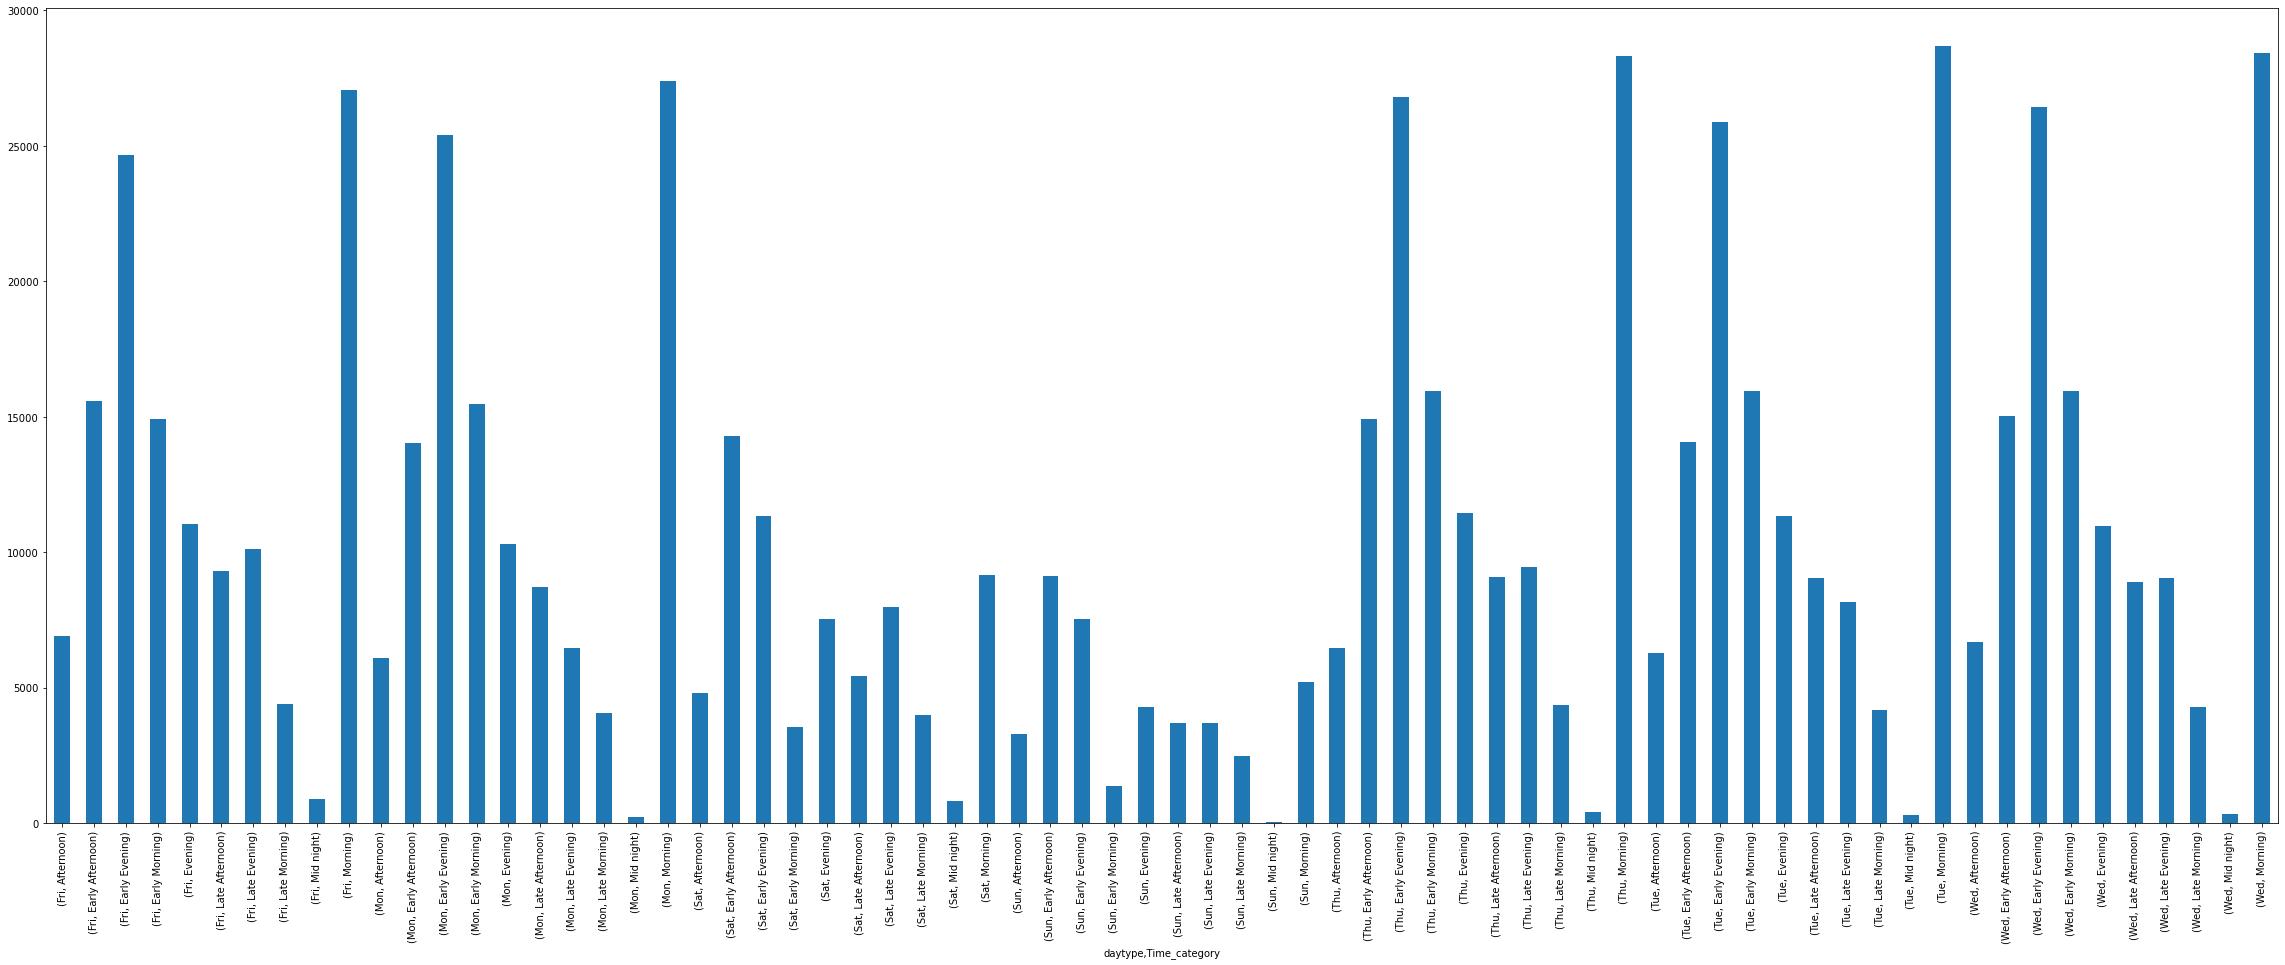

In [56]:
plt.figure(figsize=(40,15))
df.groupby(by=['daytype', 'Time_category']).count()['downo'].plot(kind='bar')

In [57]:
df.to_csv('Journey_Matched.csv')

In [58]:
tube.head()

,Tube Line,From Station,To Station,Distance km
0,Bakerloo,baker-street,regents-park,0.803591
1,Bakerloo,charing-cross,embankment,0.204870
2,Bakerloo,edgware-road-bakerloo,marylebone,0.525181
3,Bakerloo,embankment,waterloo,0.782531
4,Bakerloo,harlesden,willesden-junction,1.041189


In [59]:
tube.sample(10)

,Tube Line,From Station,To Station,Distance km
753,Southeastern,west-dulwich,sydenham-hill,1.176425
153,District,embankment,westminster,0.682306
819,Southern,streatham-hill,west-norwood,1.878595
405,Metropolitan,euston-square,great-portland-street,0.915859
535,Overground,kew-gardens,gunnersbury,1.819936
204,DLR,east-india,canning-town,0.937531
497,Overground,canonbury,dalston-kingsland,1.131975
746,Southeastern,st-johns,lewisham,0.876522
561,Overground,southbury,turkey-street,2.723070
815,Southern,st-helier,sutton-common,1.603585


In [60]:
tube.to_csv('tube_matched.csv')

In [49]:
import networkx as nx
import csv

file  = open('tube_matched.csv', "r", encoding='utf8')
a=file.readlines()
G=nx.Graph()
for i in a[1:]:
    i=i[:-1]
    i=i.split(',')
    print(i)
    G.add_edge(i[2],i[3],weight=float(i[4]))

['0', 'Bakerloo', 'baker-street', 'regents-park', '0.8035911111386282']
['1', 'Bakerloo', 'charing-cross', 'embankment', '0.20487024933693085']
['2', 'Bakerloo', 'edgware-road-bakerloo', 'marylebone', '0.5251813229659411']
['3', 'Bakerloo', 'embankment', 'waterloo', '0.782531067418954']
['4', 'Bakerloo', 'harlesden', 'willesden-junction', '1.0411887202589505']
['5', 'Bakerloo', 'harrow-and-wealdstone', 'kenton', '1.8040553938363457']
['6', 'Bakerloo', 'kensal-green', 'queens-park', '1.4409834494349716']
['7', 'Bakerloo', 'kenton', 'south-kenton', '1.2612092071622054']
['8', 'Bakerloo', 'kilburn-park', 'maida-vale', '0.8219229421551929']
['9', 'Bakerloo', 'lambeth-north', 'elephant-and-castle', '0.8464435931625731']
['10', 'Bakerloo', 'maida-vale', 'warwick-avenue', '0.7854124277295627']
['11', 'Bakerloo', 'marylebone', 'baker-street', '0.4631963576754993']
['12', 'Bakerloo', 'north-wembley', 'wembley-central', '1.282676423112401']
['13', 'Bakerloo', 'oxford-circus', 'piccadilly-circus'

['754', 'Southeastern', 'west-wickham', 'hayes', '1.8237150189044986']
['755', 'Southeastern', 'westcombe-park', 'charlton', '0.9499178693870348']
['756', 'Southeastern', 'woolwich-arsenal', 'plumstead', '1.0462632986664409']
['757', 'Southeastern', 'woolwich-dockyard', 'woolwich-arsenal', '1.018661965449667']
['758', 'Southern', 'anerley', 'norwood-junction', '1.866776598010534']
['759', 'Southern', 'balham', 'mitcham-eastfields', '3.871725135104003']
['760', 'Southern', 'balham', 'streatham-common', '2.9372471328014305']
['761', 'Southern', 'balham', 'streatham-hill', '1.811382552444394']
['762', 'Southern', 'balham', 'tooting', '2.6535323736873737']
['763', 'Southern', 'banstead', 'epsom-downs', '1.9020620582295202']
['764', 'Southern', 'battersea-park', 'clapham-junction', '2.1069861839703283']
['765', 'Southern', 'belmont', 'banstead', '1.902266372031798']
['766', 'Southern', 'birkbeck', 'beckenham-junction', '2.2633950830705856']
['767', 'Southern', 'brockley', 'honor-oak-park', 

In [5]:
G.is_directed()

False

In [63]:
G['baker-street']

AtlasView({'regents-park': {'weight': 0.8035911111386282}, 'marylebone': {'weight': 0.4631963576754993}, 'great-portland-street': {'weight': 0.8987202342284591}, 'edgware-road-circledistricthammersmith-and-city': {'weight': 0.8223850363081244}, 'bond-street': {'weight': 1.1541630242979395}, 'st-johns-wood': {'weight': 1.7637795338230238}, 'finchley-road': {'weight': 3.1098534077169413}})

In [11]:
G['baker-street']['regents-park']['weight']

0.8035911111386282

In [50]:
p = nx.shortest_path(G, source='preston-road',target ='northwood',weight='weight',)

In [26]:
p

['preston-road',
 'northwick-park',
 'harrow-on-the-hill',
 'north-harrow',
 'pinner',
 'northwood-hills',
 'northwood']

In [16]:
path=p['northwood']

In [32]:
def distance(G, source,target,weight):
    path=nx.shortest_path(G, source=source,target =target, weight=weight)
    distance=0
    for idx in range(len(path)-1):
        source=path[idx]
        target=path[idx+1]
        distance+=G[source][target]['weight']
    return distance

In [33]:
distance(G,'preston-road','northwood','weight')

10.159208526358956

In [35]:
df=pd.read_csv('Journey_Matched.csv')

In [37]:
df.sample(20)

,Unnamed: 0,downo,daytype,SubSystem,StartStn,EndStation,EntTime,EntTimeHHMM,ExTime,EXTimeHHMM,ZVPPT,JNYTYP,DailyCapping,FFare,DFare,RouteID,FinalProduct,JourneyLength,Time_category
495814,1585673,4,Wed,LUL/NR,ealing-broadway,ealing-broadway,588,09:48,589,09:49,Z0110,TKT,N,0,0,XX,Freedom Pass (Elderly),1,Morning
146558,472847,4,Wed,LUL,elephant-and-castle,holborn,1118,18:38,1143,19:03,-------,PPY,N,160,160,XX,PAYG,25,Early Evening
198539,631171,5,Thu,LUL,warren-street,turnpike-lane,1183,19:43,1205,20:05,Z0103,TKT,N,0,0,XX,LUL Travelcard-Annual,22,Evening
221976,707770,5,Thu,LUL,oxford-circus,brixton,1230,20:30,1249,20:49,Z0102,TKT,N,0,0,XX,LUL Travelcard-7 Day,19,Evening
457763,1460467,4,Wed,LUL,hammersmith-met,leicester-square,541,09:01,563,09:23,-------,PPY,N,220,220,XX,PAYG,22,Morning
466370,1486773,3,Tue,LUL,lancaster-gate,bermondsey,550,09:10,577,09:37,Z0102,TKT,N,0,0,XX,LUL Travelcard-7 Day,27,Morning
104759,357245,2,Mon,LUL,bank,waterloo,1084,18:04,1089,18:09,-------,PPY,N,160,160,XX,PAYG,5,Early Evening
537513,1767670,3,Tue,LUL,st-pauls,liverpool-street,678,11:18,687,11:27,-------,PPY,N,160,160,XX,PAYG,9,Late Morning
613864,2107445,7,Sat,LUL,colliers-wood,south-kensington,825,13:45,874,14:34,-------,PPY,N,220,220,XX,PAYG,49,Early Afternoon
153051,491320,3,Tue,LUL,euston,victoria,1124,18:44,1136,18:56,-------,PPY,N,160,160,XX,PAYG,12,Early Evening


In [48]:
df[(df['StartStn']=='warren-street') & (
    df['EndStation']=='turnpike-lane')]

,Unnamed: 0,downo,daytype,SubSystem,StartStn,EndStation,EntTime,EntTimeHHMM,ExTime,EXTimeHHMM,ZVPPT,JNYTYP,DailyCapping,FFare,DFare,RouteID,FinalProduct,JourneyLength,Time_category
2506,55072,4,Wed,LUL,warren-street,turnpike-lane,1002,16:42,1026,17:06,-------,PPY,N,270,270,XX,PAYG,24,Late Afternoon
29825,146070,4,Wed,LUL,warren-street,turnpike-lane,1028,17:08,1051,17:31,Z0103,TKT,N,0,0,XX,LUL Travelcard-Annual,23,Early Evening
75452,276380,3,Tue,LUL,warren-street,turnpike-lane,1062,17:42,1084,18:04,Z0110,TKT,N,0,0,XX,Freedom Pass (Elderly),22,Early Evening
83948,299300,3,Tue,LUL,warren-street,turnpike-lane,1068,17:48,1090,18:10,Z0103,TKT,N,0,0,XX,LUL Travelcard-1 Month,22,Early Evening
123226,407037,6,Fri,LUL,warren-street,turnpike-lane,1098,18:18,1119,18:39,Z0103,TKT,N,0,0,XX,LUL Travelcard-1 Month,21,Early Evening
127927,419960,4,Wed,LUL,warren-street,turnpike-lane,1102,18:22,1123,18:43,Z0103,TKT,N,0,0,XX,LUL Travelcard-1 Month,21,Early Evening
139198,452016,3,Tue,LUL,warren-street,turnpike-lane,1111,18:31,1134,18:54,Z0103,TKT,N,0,0,XX,LUL Travelcard-Annual,23,Early Evening
144107,465939,5,Thu,LUL,warren-street,turnpike-lane,1116,18:36,1137,18:57,Z0103,TKT,N,0,0,XX,LUL Travelcard-1 Month,21,Early Evening
149450,481069,4,Wed,LUL,warren-street,turnpike-lane,1121,18:41,1144,19:04,Z0103,TKT,N,0,0,XX,LUL Travelcard-1 Month,23,Early Evening
173620,553035,3,Tue,LUL,warren-street,turnpike-lane,1147,19:07,1169,19:29,-------,PPY,N,220,220,XX,PAYG,22,Evening


In [41]:
G.nodes()

NodeView(('baker-street', 'regents-park', 'charing-cross', 'embankment', 'edgware-road-bakerloo', 'marylebone', 'waterloo', 'harlesden', 'willesden-junction', 'harrow-and-wealdstone', 'kenton', 'kensal-green', 'queens-park', 'south-kenton', 'kilburn-park', 'maida-vale', 'lambeth-north', 'elephant-and-castle', 'warwick-avenue', 'north-wembley', 'wembley-central', 'oxford-circus', 'piccadilly-circus', 'paddington', 'stonebridge-park', 'barking', 'dagenham-dock', 'upminster', 'purfleet', 'rainham', 'fenchurch-street', 'limehouse', 'stratford', 'west-ham', 'liverpool-street', 'ockendon', 'chafford-hundred', 'bank', 'st-pauls', 'barkingside', 'fairlop', 'bethnal-green', 'bond-street', 'marble-arch', 'buckhurst-hill', 'woodford', 'chancery-lane', 'holborn', 'chigwell', 'roding-valley', 'debden', 'loughton', 'east-acton', 'north-acton', 'epping', 'theydon-bois', 'hainault', 'gants-hill', 'newbury-park', 'grange-hill', 'greenford', 'northolt', 'hanger-lane', 'perivale', 'tottenham-court-road',

# Checking New data (Does the new station data set match the old one in terms of station name?)

In [4]:
tube_old=pd.read_csv('tube_matched.csv')

In [5]:
tube_old.sample(5)

,Unnamed: 0,Tube Line,From Station,To Station,Distance km
508,508,Overground,finchley-road-and-frognal,hampstead-heath,1.435838
265,265,Elizabeth,southall,hayes-and-harlington,2.921050
757,757,Southeastern,woolwich-dockyard,woolwich-arsenal,1.018662
581,581,Overground,wembley-central,stonebridge-park,1.695931
184,184,District,west-brompton,fulham-broadway,0.786174


In [84]:
#tube_new=pd.read_csv('station list-2017.csv', header=None,names=['Tube Line','Direction','From Station','To Station','Distance km','Un-impeded Running Time','AM peak (0700-1000) Running Time (Mins)', 'Inter peak (1000 - 1600) Running time (mins)'])
tube_new=pd.read_csv('station list-2017.csv', usecols=['Tube Line','Direction','From Station','To Station','Distance km'])

In [85]:
tube_new.sample(5)

,Tube Line,Direction,From Station,To Station,Distance km
774,DLR,Westbound,Royal Albert,Prince Regent,0.85
118,Central,Westbound,STRATFORD,MILE END,2.83
88,Central,Inner,RODING VALLEY,WOODFORD,1.33
61,Central,Eastbound,HOLLAND PARK,NOTTING HILL GATE,0.61
693,District,Eastbound,BAYSWATER,PADDINGTON (Dis),0.98


In [86]:
tube_new['From Station']=tube_new['From Station'].apply(clear_name)
tube_new['To Station']=tube_new['To Station'].apply(clear_name)

In [87]:
tube_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tube Line     835 non-null    object 
 1   Direction     835 non-null    object 
 2   From Station  835 non-null    object 
 3   To Station    835 non-null    object 
 4   Distance km   835 non-null    float64
dtypes: float64(1), object(4)
memory usage: 32.7+ KB


In [88]:
tube_new.sample(5)

,Tube Line,Direction,From Station,To Station,Distance km
476,Metropolitan,Eastbound,pinner,north-harrow,1.48
825,DLR,Southbound,canary-wharf,heron-quays,0.15
569,Circle,Inner,mansion-house,cannon-street,0.31
823,DLR,Southbound,poplar,west-india-quay,0.22
792,DLR,Northbound,island-gardens,mudchute,0.38


In [89]:
tube_new.dropna(inplace=True)

In [90]:
tube_new['Distance km']=[np.float32(i) for i in tube_new['Distance km']]
#tube_new['Un-impeded Running Time']=[np.float32(i) for i in tube_new['Un-impeded Running Time']]
#tube_new['AM peak (0700-1000) Running Time (Mins)']=[np.float32(i) for i in tube_new['AM peak (0700-1000) Running Time (Mins)']]
#tube_new['Inter peak (1000 - 1600) Running time (mins)']=[np.float32(i) for i in tube_new['Inter peak (1000 - 1600) Running time (mins)']]


In [91]:
tube_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835 entries, 0 to 834
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tube Line     835 non-null    object 
 1   Direction     835 non-null    object 
 2   From Station  835 non-null    object 
 3   To Station    835 non-null    object 
 4   Distance km   835 non-null    float64
dtypes: float64(1), object(4)
memory usage: 39.1+ KB


In [92]:
all_stat_newtube=set(list(tube_new['From Station'].unique())+list(tube_new['To Station'].unique()))

In [93]:
all_stat_oldtube=set(list(tube_old['From Station'].unique())+list(tube_old['To Station'].unique()))

In [94]:
print ( 'There are ', len(all_stat_newtube-all_stat_oldtube), 'stations in new tube that are not mentioned in old tube DataSet')

There are  27 stations in new tube that are not mentioned in old tube DataSet


In [95]:
print ( 'There are ', len(all_stat_oldtube-all_stat_newtube), 'stations in old tube that are not mentioned in new tube DataSet')

There are  353 stations in old tube that are not mentioned in new tube DataSet


In [96]:
all_stat_oldtube-all_stat_newtube

{'abbey-wood',
 'acton-central',
 'acton-main-line',
 'addington-village',
 'addiscombe',
 'albany-park',
 'alexandra-palace',
 'ampere-way',
 'anerley',
 'angel-road',
 'arena',
 'avenue-road',
 'banstead',
 'barnehurst',
 'barnes',
 'barnes-bridge',
 'battersea-park',
 'battersea-power-station',
 'beckenham-hill',
 'beckenham-junction',
 'beckenham-road',
 'beddington-lane',
 'belgrave-walk',
 'bellingham',
 'belmont',
 'belvedere',
 'berrylands',
 'bexley',
 'bexleyheath',
 'bickley',
 'birkbeck',
 'blackheath',
 'blackhorse-lane',
 'bowes-park',
 'brentford',
 'brentwood',
 'brimsdown',
 'brockley',
 'bromley-north',
 'bromley-south',
 'brondesbury',
 'brondesbury-park',
 'broxbourne',
 'bruce-grove',
 'burnham',
 'bush-hill-park',
 'bushey',
 'caledonian-road-and-barnsbury',
 'cambridge-heath',
 'camden-road',
 'canonbury',
 'carpenders-park',
 'carshalton',
 'carshalton-beeches',
 'castle-bar-park',
 'caterham',
 'catford',
 'catford-bridge',
 'centrale',
 'chadwell-heath',
 'cha

In [97]:
tube_new[tube_new['From Station']=='abbey-road']

,Tube Line,Direction,From Station,To Station,Distance km
808,DLR,Northbound,abbey-road,stratford-high-street,0.53
814,DLR,Southbound,abbey-road,west-ham,0.50


## The new dataset is unmatchable, therefore we should only stick  to the data set that we provided in which the distances were approximated using Euclidean Distance. (Old Tube)